##### Write about Dataset and Why we are using it?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

##### Types of Time Series Data
<img src="./images/time_series.jpg" />

In [2]:
df = pd.read_csv('./Dataset/PJME_hourly.csv')
df.head()

,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


In [3]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
df['Datetime']

0        2002-12-31 01:00:00
1        2002-12-31 02:00:00
2        2002-12-31 03:00:00
3        2002-12-31 04:00:00
4        2002-12-31 05:00:00
                 ...        
145361   2018-01-01 20:00:00
145362   2018-01-01 21:00:00
145363   2018-01-01 22:00:00
145364   2018-01-01 23:00:00
145365   2018-01-02 00:00:00
Name: Datetime, Length: 145366, dtype: datetime64[ns]

In [4]:
print(df.columns)

Index(['Datetime', 'PJME_MW'], dtype='object')


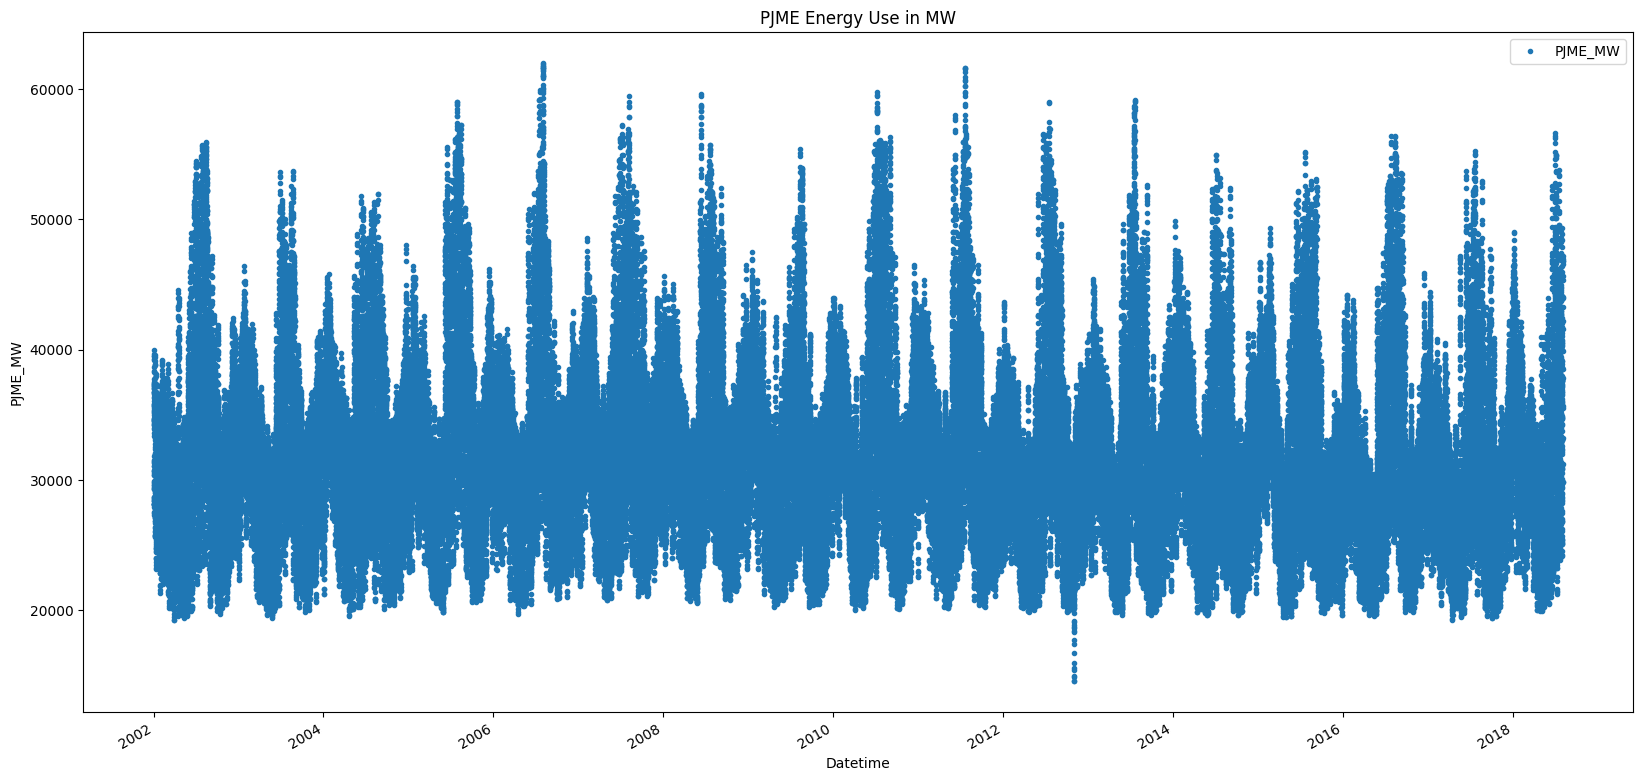

In [5]:
df.plot(style='.',figsize=(20,10),title='PJME Energy Use in MW',x='Datetime',y='PJME_MW')
plt.xlabel('Datetime')
plt.ylabel('PJME_MW')
plt.show()

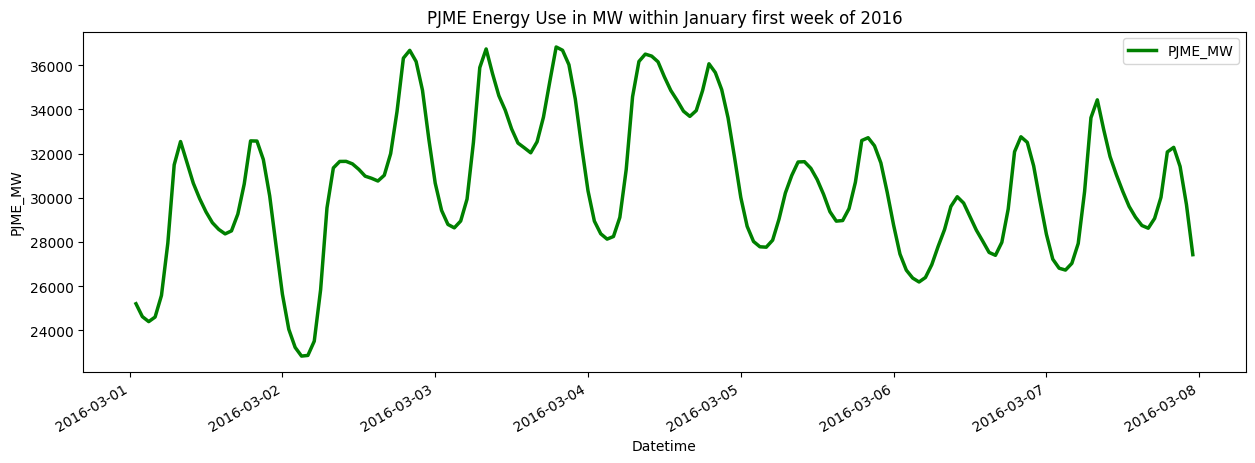

In [6]:
df.loc[(df['Datetime'] > '2016-03-01') & (df['Datetime'] < '2016-03-08')].\
    plot(figsize=(15, 5), title='PJME Energy Use in MW within January first week of 2016',linewidth=2.5,color='green',x='Datetime',y='PJME_MW')
plt.xlabel('Datetime')
plt.ylabel('PJME_MW')
plt.show()

##### Outlier Analysis
<img src="./images/outlier_analysis_fin.png" />

<AxesSubplot: ylabel='Frequency'>

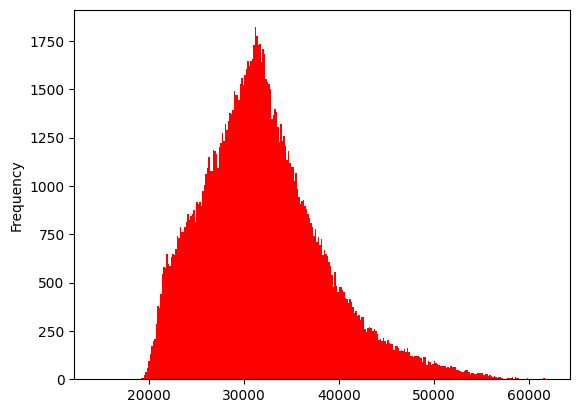

In [7]:
df['PJME_MW'].plot(kind='hist',bins=300,color='red')

<AxesSubplot: xlabel='Datetime'>

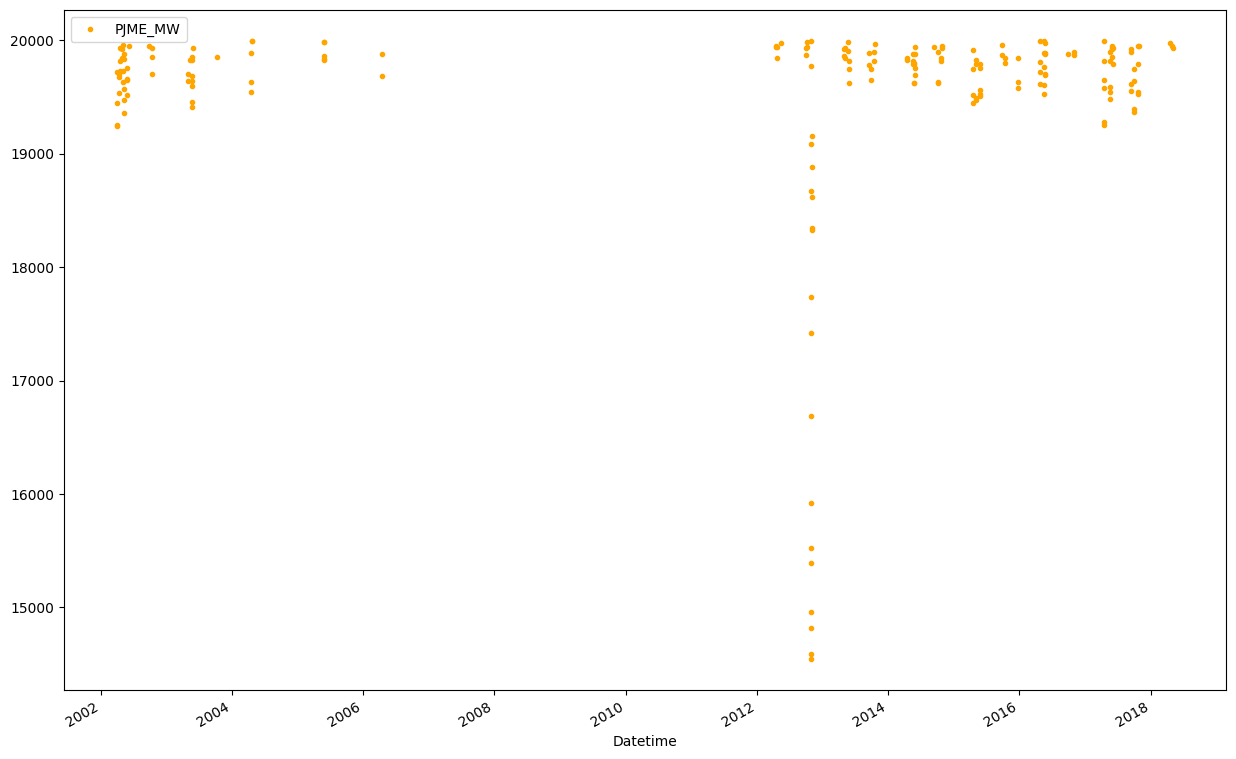

In [8]:
df.query('PJME_MW < 20000').plot(style='.',figsize=(15,10),x='Datetime',y='PJME_MW',color='orange')

<AxesSubplot: xlabel='Datetime'>

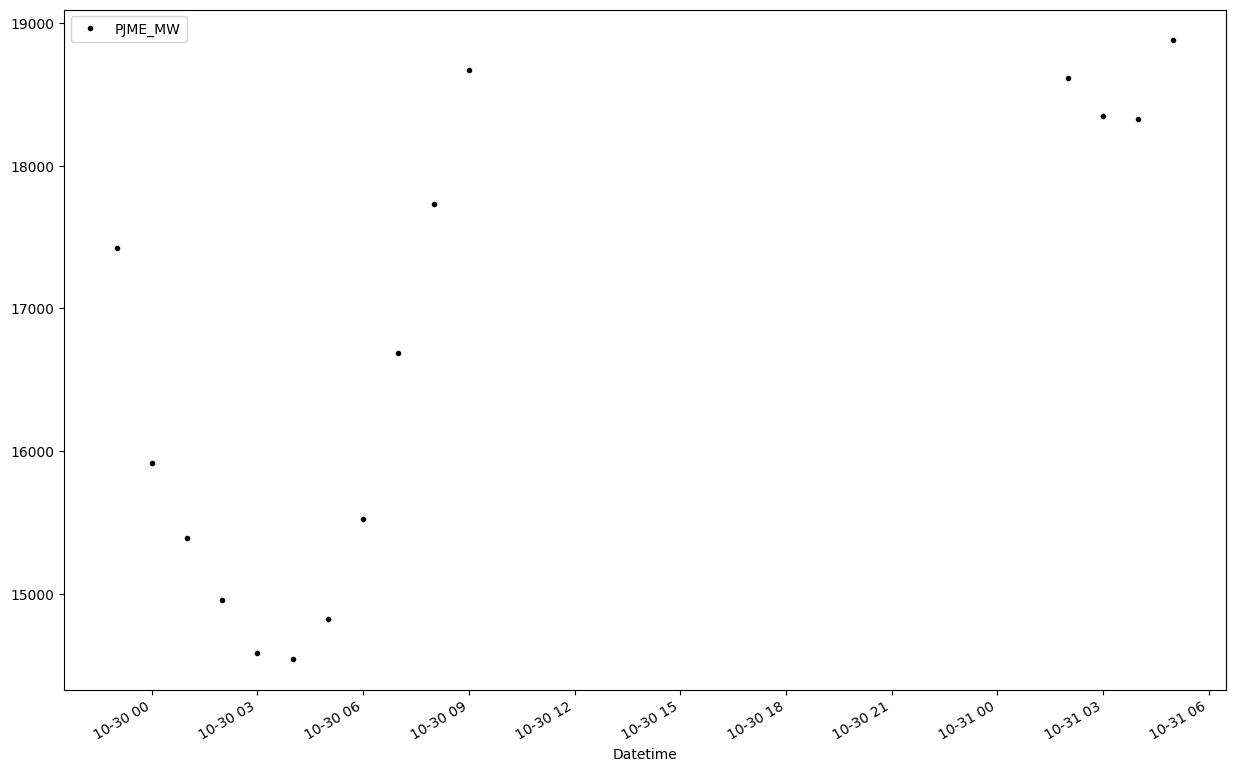

In [9]:
df.query('PJME_MW < 19_000').plot(style='.',figsize=(15,10),x='Datetime',y='PJME_MW',color='black')

In [10]:
print(df.shape)
print(df.query('PJME_MW > 19_000').shape)

(145366, 2)
(145351, 2)


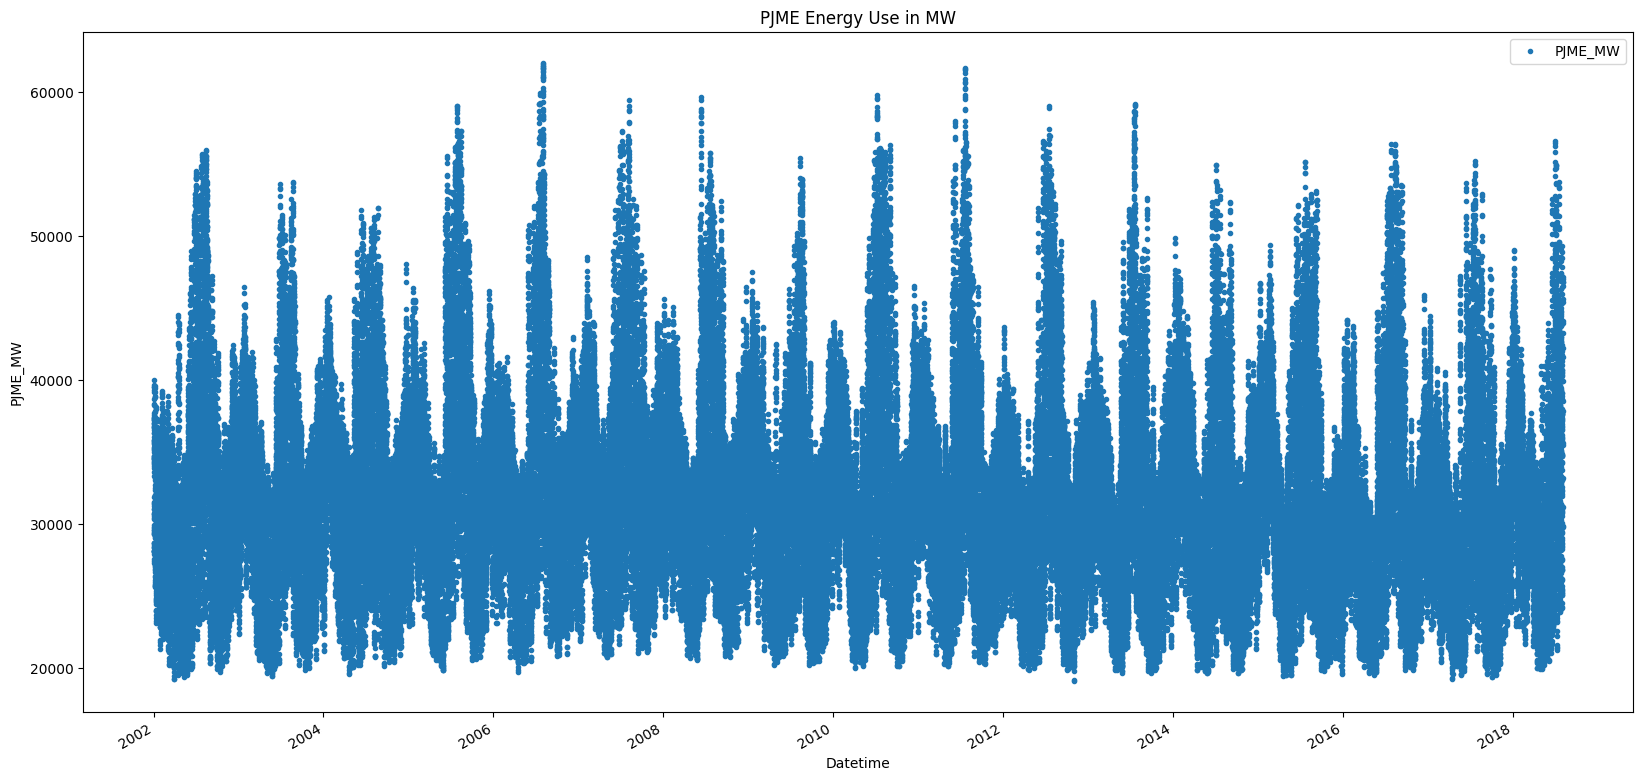

In [11]:
df = df.query('PJME_MW > 19_000')
df.plot(style='.',figsize=(20,10),title='PJME Energy Use in MW',x='Datetime',y='PJME_MW')
plt.xlabel('Datetime')
plt.ylabel('PJME_MW')
plt.show()
df = df.reset_index(drop=True)

##### Adding Lag Features

In [12]:
def Plot_Day_Time(d,t):
    fig, axs = plt.subplots(3, 4, figsize=(20, 15))

    for month in range(1, 13):
        filtered_df = df.loc[(df['Datetime'].dt.month == month) & (df['Datetime'].dt.day == d) &\
            (df['Datetime'].dt.time == pd.Timestamp(t).time())]
        row = (month - 1) // 4
        col = (month - 1) % 4
        axs[row, col].plot(filtered_df['Datetime'],filtered_df['PJME_MW'],'.',color='red')
        axs[row, col].set_ylim(20_000, 60_000)
        axs[row, col].set_title(f'Month {month}')
        axs[row, col].set_xlabel('Datetime')
        axs[row, col].set_ylabel('PJME_ME')
        axs[row, col].grid(True)

    plt.tight_layout()
    plt.show()

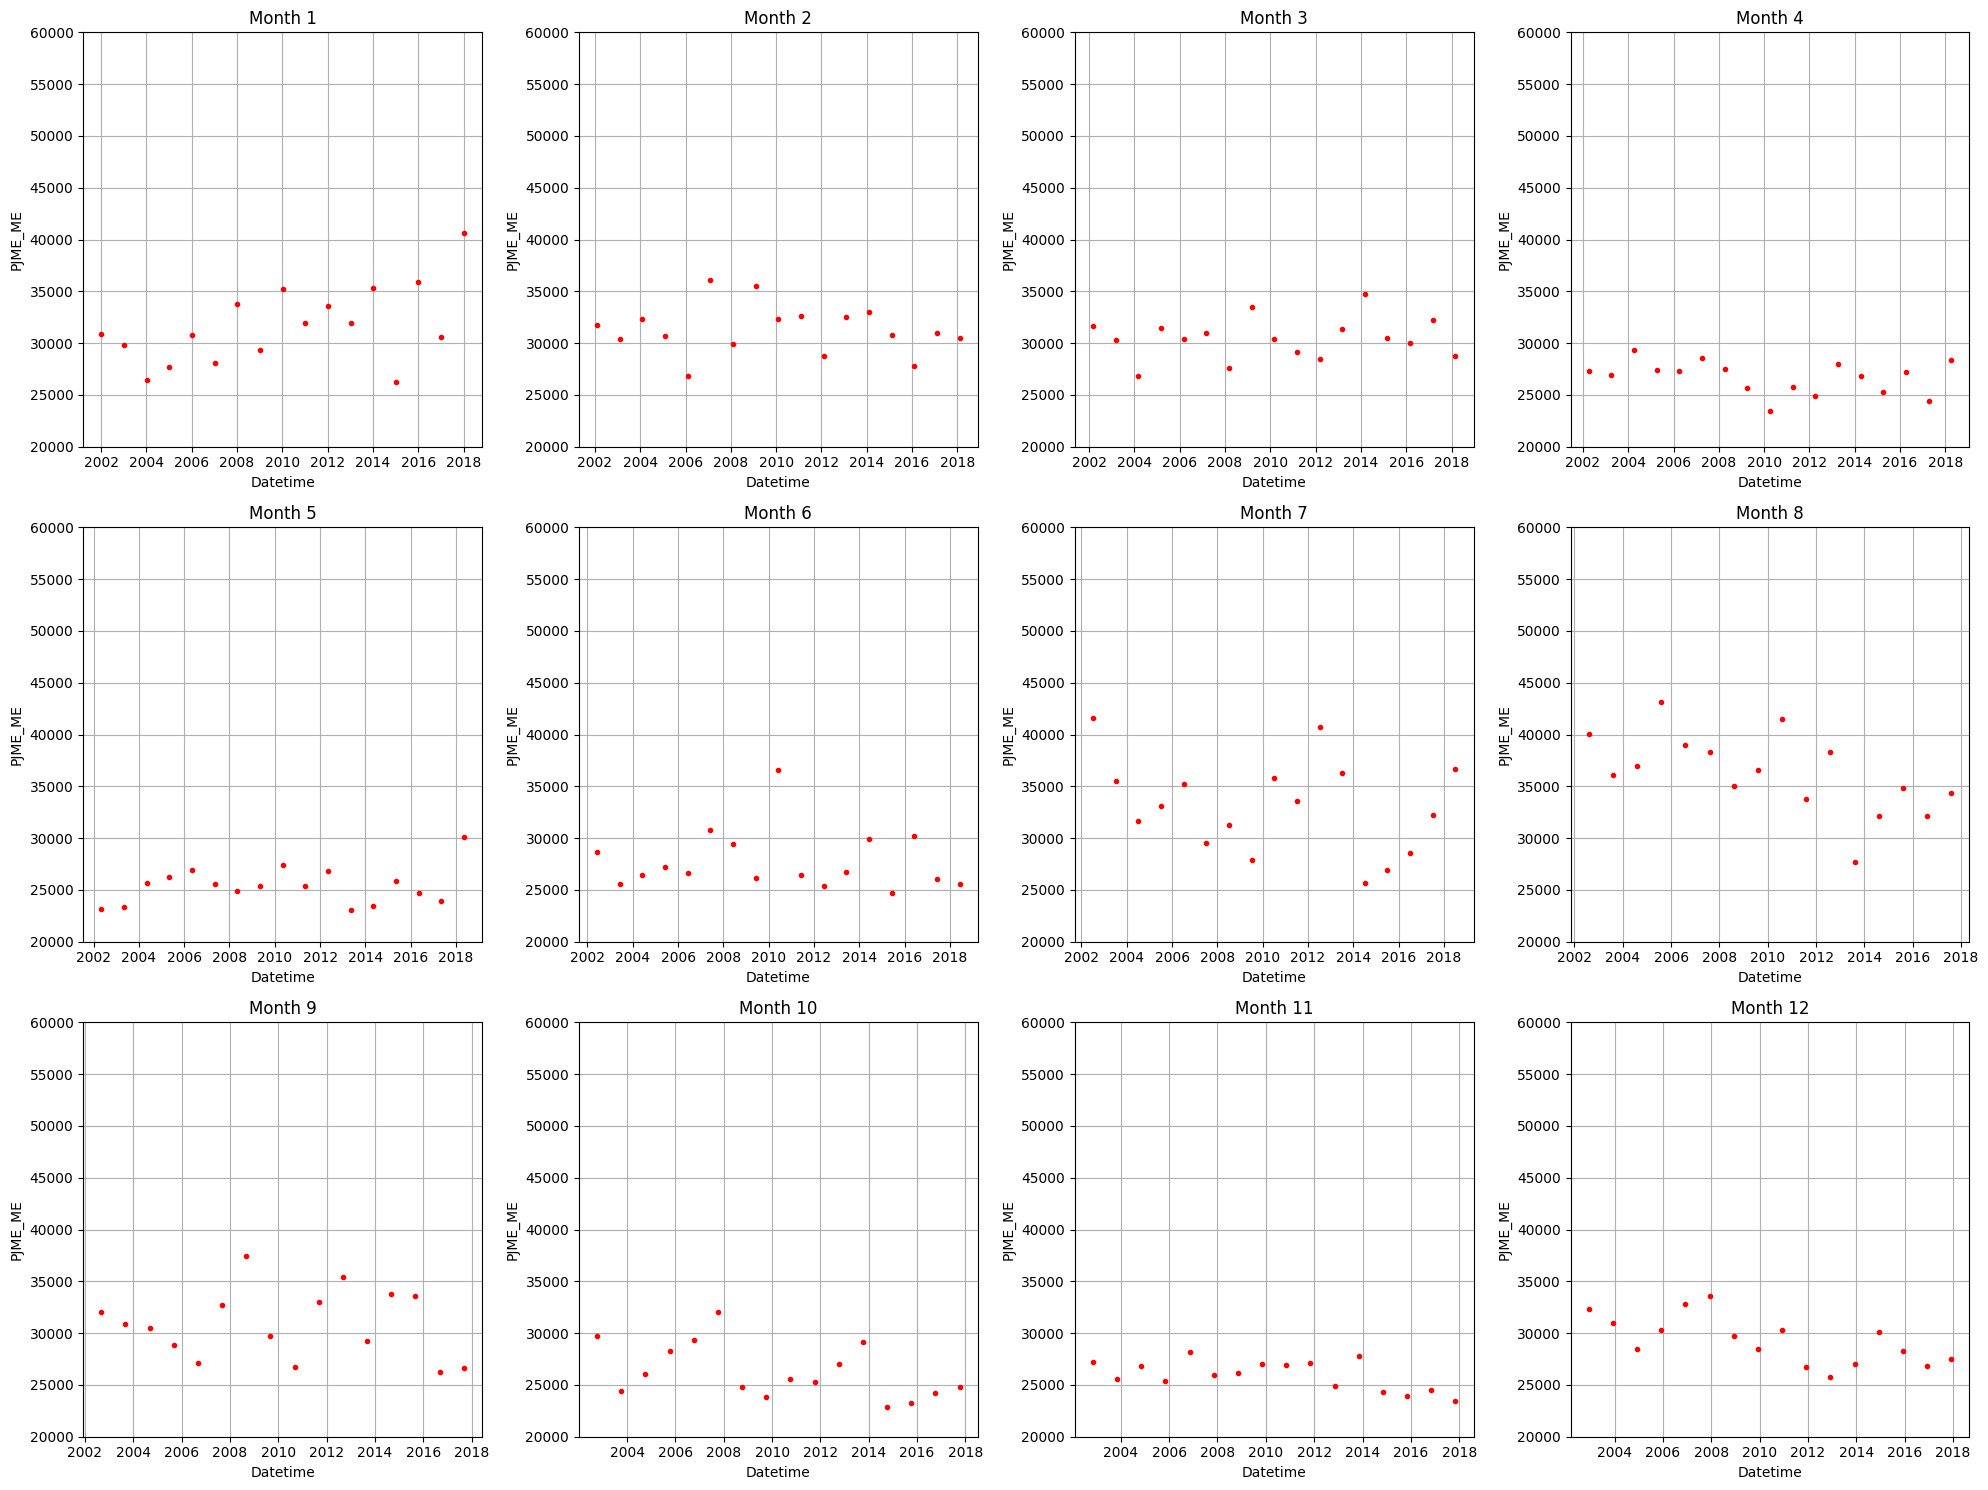

In [13]:
Plot_Day_Time(5,'00:00:00')

In [14]:
lag_dict = dict(zip(df['Datetime'], df['PJME_MW']))
df['Lag1'] = (df['Datetime']-pd.Timedelta('365 days')).map(lag_dict)
df['Lag2'] = (df['Datetime']-pd.Timedelta('730 days')).map(lag_dict)
# df['Lag3'] = (df['Datetime']-pd.Timedelta('1,095 days')).map(lag_dict)

In [15]:
df

,Datetime,PJME_MW,Lag1,Lag2
0,2002-12-31 01:00:00,26498.0,NaN,NaN
1,2002-12-31 02:00:00,25147.0,NaN,NaN
2,2002-12-31 03:00:00,24574.0,NaN,NaN
3,2002-12-31 04:00:00,24393.0,NaN,NaN
4,2002-12-31 05:00:00,24860.0,NaN,NaN
...,...,...,...,...
145346,2018-01-01 20:00:00,44284.0,31448.0,32878.0
145347,2018-01-01 21:00:00,43751.0,31246.0,32586.0
145348,2018-01-01 22:00:00,42402.0,30526.0,31877.0
145349,2018-01-01 23:00:00,40164.0,29209.0,30590.0


##### Trigonometric Encoding to handle cyclic features.

In [16]:
df['Hour'] = df['Datetime'].dt.hour.astype(int)
df['Day'] = df['Datetime'].dt.day.astype(int)
df['Month'] = df['Datetime'].dt.month.astype(int)
df['Year'] = df['Datetime'].dt.year.astype(int)
df

,Datetime,PJME_MW,Lag1,Lag2,Hour,Day,Month,Year
0,2002-12-31 01:00:00,26498.0,NaN,NaN,1,31,12,2002
1,2002-12-31 02:00:00,25147.0,NaN,NaN,2,31,12,2002
2,2002-12-31 03:00:00,24574.0,NaN,NaN,3,31,12,2002
3,2002-12-31 04:00:00,24393.0,NaN,NaN,4,31,12,2002
4,2002-12-31 05:00:00,24860.0,NaN,NaN,5,31,12,2002
...,...,...,...,...,...,...,...,...
145346,2018-01-01 20:00:00,44284.0,31448.0,32878.0,20,1,1,2018
145347,2018-01-01 21:00:00,43751.0,31246.0,32586.0,21,1,1,2018
145348,2018-01-01 22:00:00,42402.0,30526.0,31877.0,22,1,1,2018
145349,2018-01-01 23:00:00,40164.0,29209.0,30590.0,23,1,1,2018


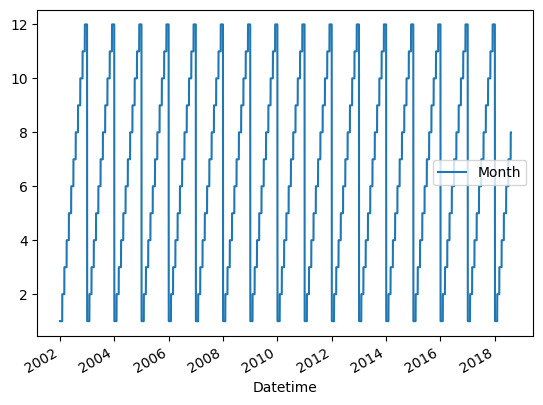

In [17]:
df.plot('Datetime','Month')
plt.show()

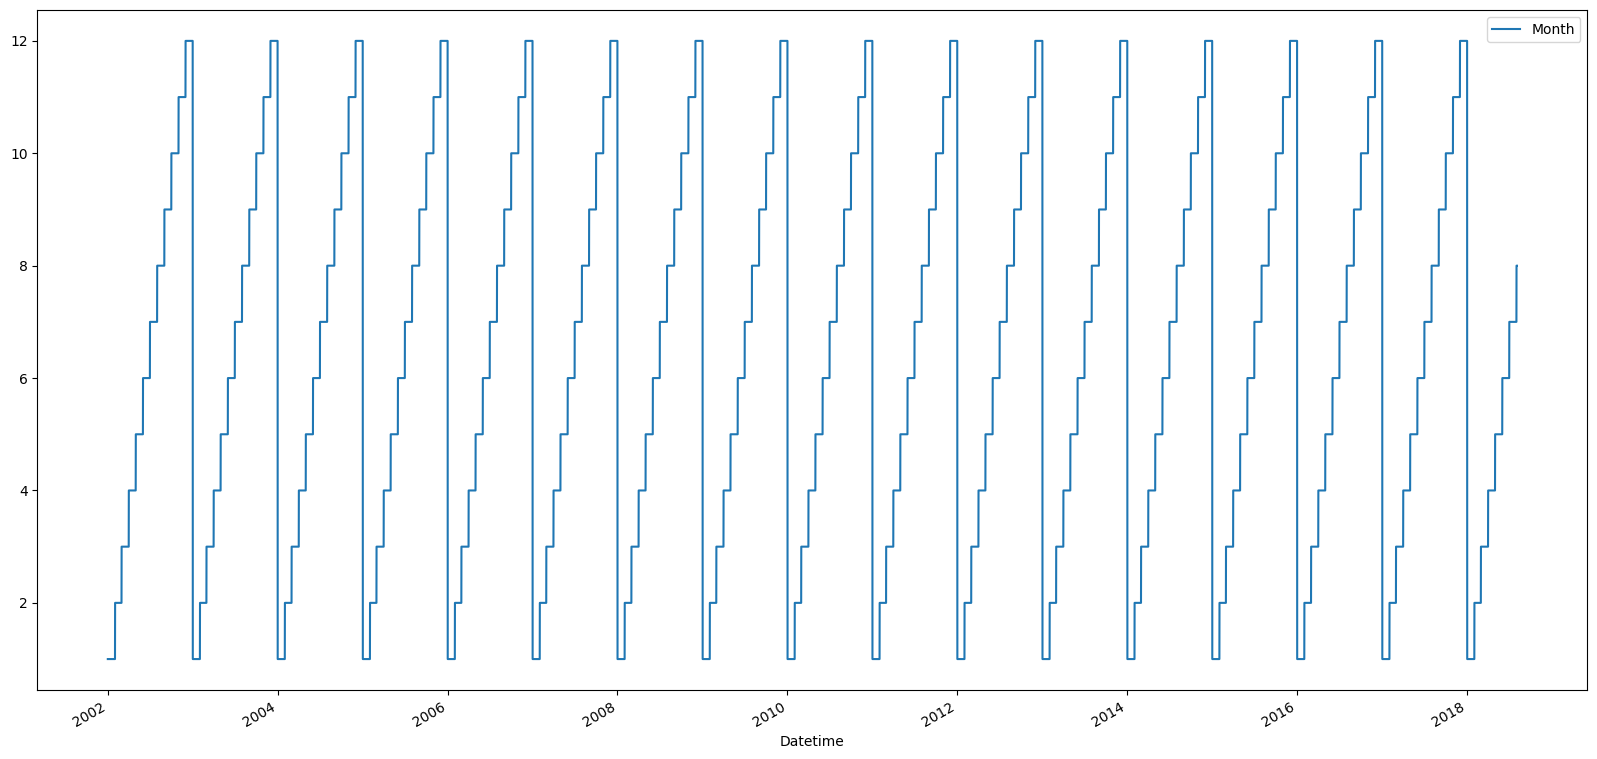

In [18]:
df.plot('Datetime','Month',figsize=(20,10))
plt.show()


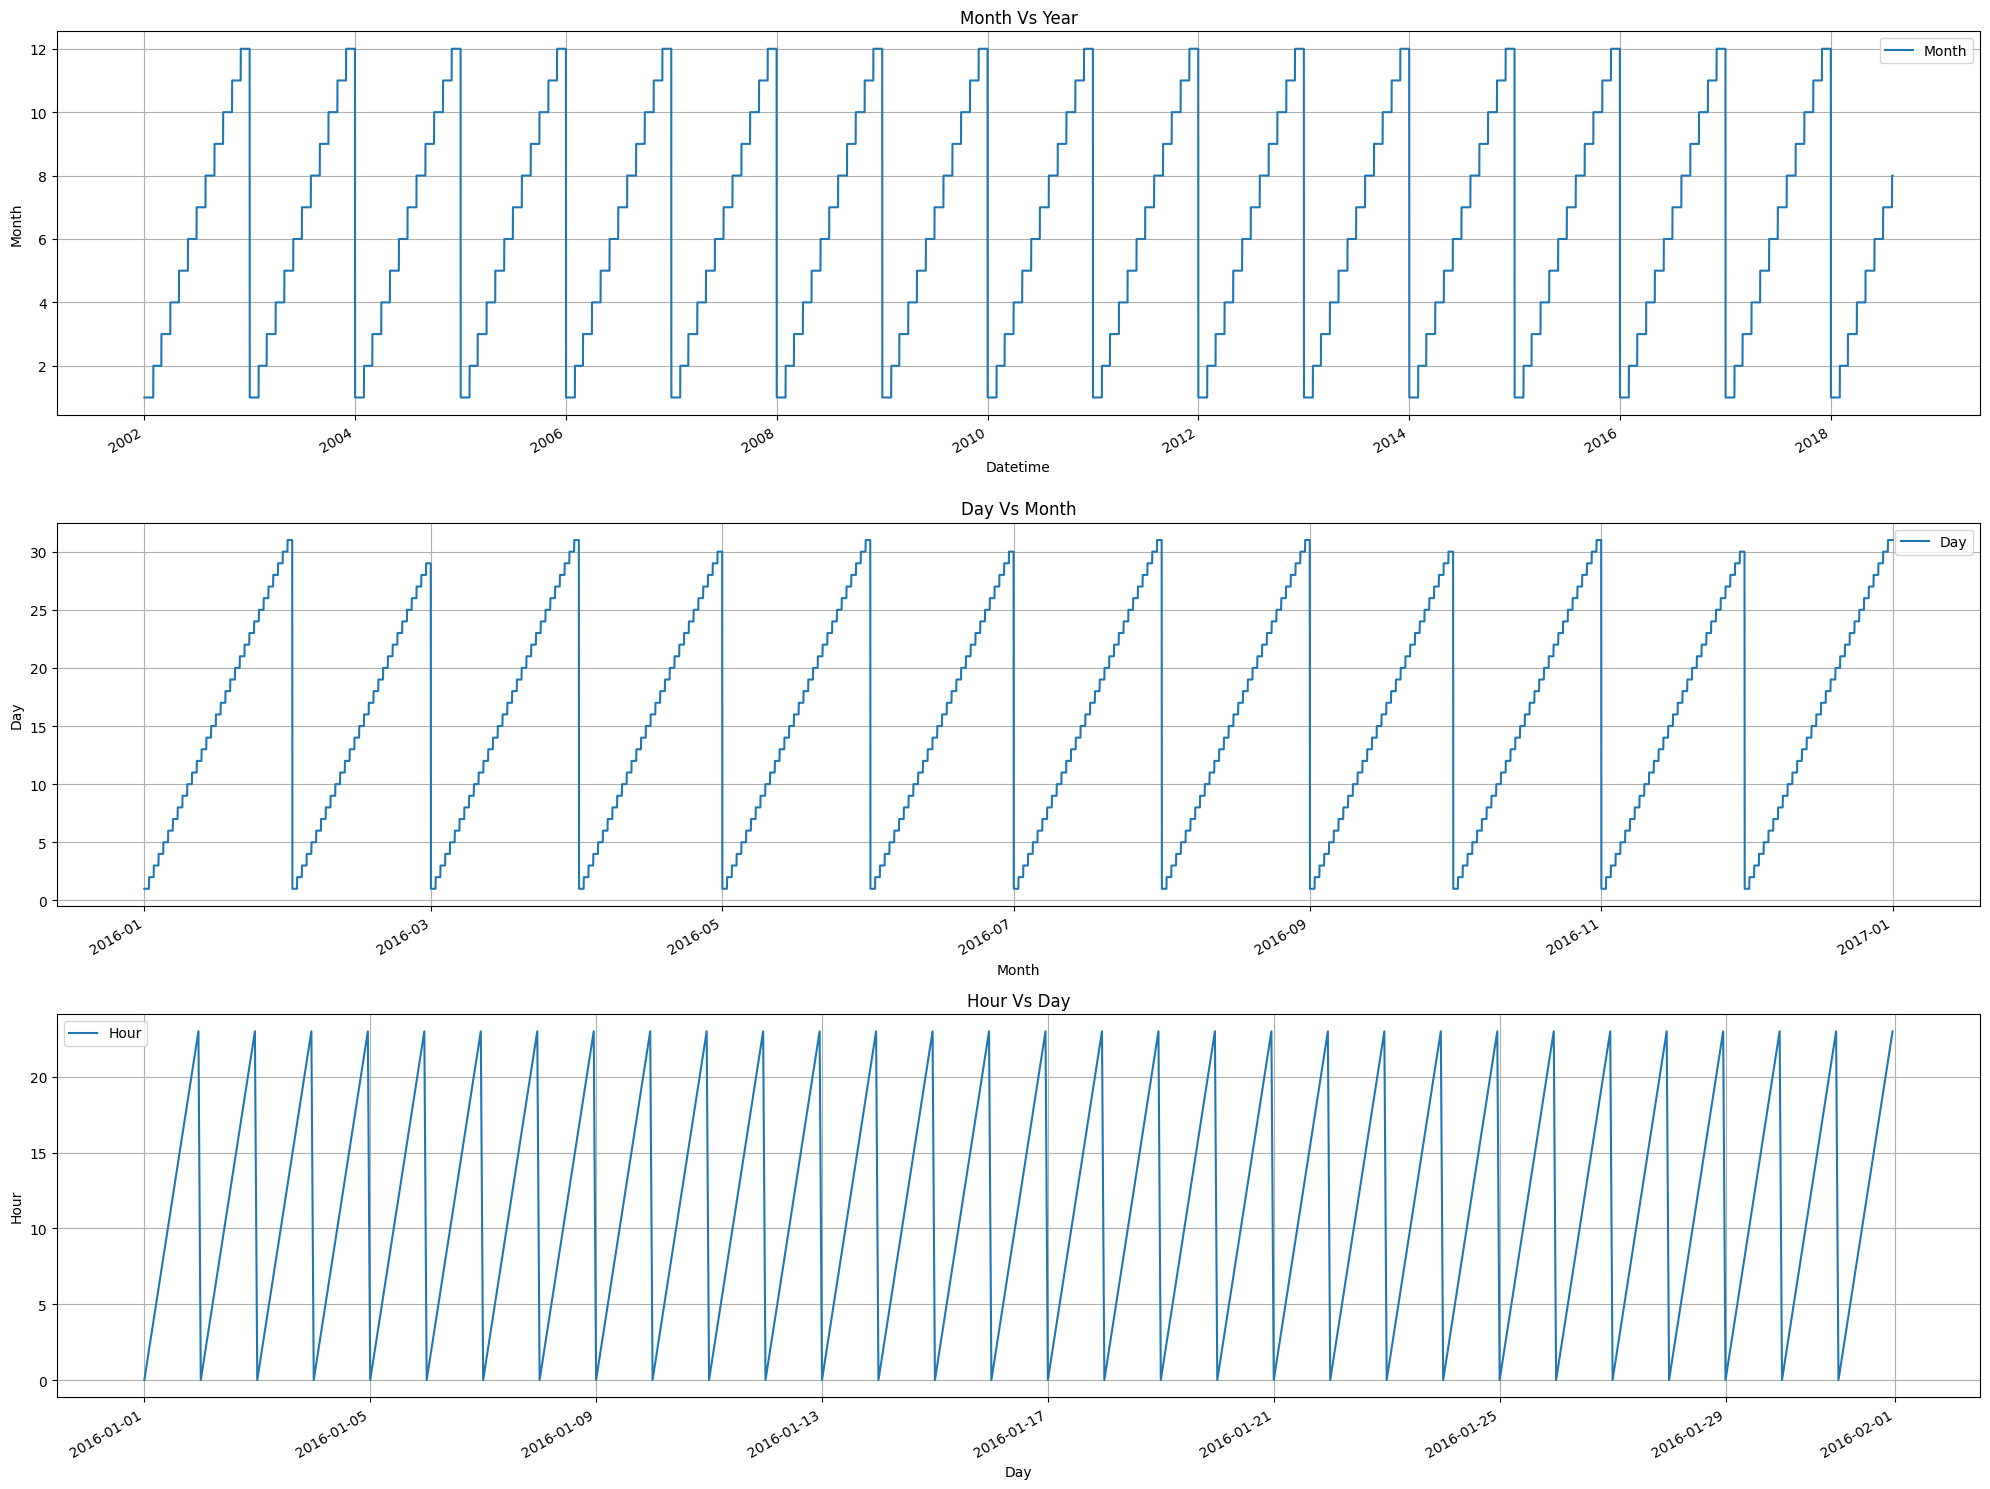

In [19]:
fig, axs = plt.subplots(3, 1, figsize=(20, 15))

df.plot('Datetime','Month',ax=axs[0])
axs[0].set_title('Month Vs Year')
axs[0].set_xlabel('Datetime')
axs[0].set_ylabel('Month')
axs[0].grid(True)

df.loc[(df['Datetime'].dt.year == 2016)].plot('Datetime','Day',ax=axs[1])
axs[1].set_title('Day Vs Month')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Day')
axs[1].grid(True)

df.loc[(df['Datetime'].dt.year == 2016) & (df['Datetime'].dt.month == 1)].plot('Datetime','Hour',ax=axs[2])
axs[2].set_title('Hour Vs Day')
axs[2].set_xlabel('Day')
axs[2].set_ylabel('Hour')
axs[2].grid(True)


plt.tight_layout()
plt.show()

In [20]:
hour_in_day=df['Hour'].nunique()
day_in_month=df['Day'].nunique()
month_in_year=df['Month'].nunique()
day_in_year = 366
print(str(hour_in_day)+' '+str(day_in_month)+' '+str(month_in_year))

24 31 12


In [21]:
def CalculateDayIndex(day,month,year):
    index = 0
    Days_Months = [
        31,  # January
        28,  # February (non-leap year)
        31,  # March
        30,  # April
        31,  # May
        30,  # June
        31,  # July
        31,  # August
        30,  # September
        31,  # October
        30,  # November
        31   # December
    ]
    Days_Months_Leap = [
        31,  # January
        29,  # February (leap year)
        31,  # March
        30,  # April
        31,  # May
        30,  # June
        31,  # July
        31,  # August
        30,  # September
        31,  # October
        30,  # November
        31   # December
    ]
    
    if((year%4) != 0):
        for i in range(0,month-1):
            index += Days_Months[i]
        index += day
    else:
        for i in range(0,month-1):
            index += Days_Months_Leap[i]
        index += day
    return index


In [22]:
print(CalculateDayIndex(1,2,2021))
print(CalculateDayIndex(29,2,2024))

32
60


In [23]:
df.iloc[0]

Datetime    2002-12-31 01:00:00
PJME_MW                 26498.0
Lag1                        NaN
Lag2                        NaN
Hour                          1
Day                          31
Month                        12
Year                       2002
Name: 0, dtype: object

In [24]:
len(df)
df.iloc[145350]
CalculateDayIndex(df.iloc[145350]['Day'],df.iloc[145350]['Month'],df.iloc[145350]['Year'])
np.cos((2*(np.pi)*CalculateDayIndex(df.iloc[145350]['Day'],df.iloc[145350]['Month'],df.iloc[145350]['Year']))/day_in_year)

0.9994106342455052

In [25]:
np.sin((2*(np.pi)*CalculateDayIndex(31,12,2018))/day_in_year)

-0.017166329754707492

In [26]:
df

,Datetime,PJME_MW,Lag1,Lag2,Hour,Day,Month,Year
0,2002-12-31 01:00:00,26498.0,NaN,NaN,1,31,12,2002
1,2002-12-31 02:00:00,25147.0,NaN,NaN,2,31,12,2002
2,2002-12-31 03:00:00,24574.0,NaN,NaN,3,31,12,2002
3,2002-12-31 04:00:00,24393.0,NaN,NaN,4,31,12,2002
4,2002-12-31 05:00:00,24860.0,NaN,NaN,5,31,12,2002
...,...,...,...,...,...,...,...,...
145346,2018-01-01 20:00:00,44284.0,31448.0,32878.0,20,1,1,2018
145347,2018-01-01 21:00:00,43751.0,31246.0,32586.0,21,1,1,2018
145348,2018-01-01 22:00:00,42402.0,30526.0,31877.0,22,1,1,2018
145349,2018-01-01 23:00:00,40164.0,29209.0,30590.0,23,1,1,2018


In [27]:
df['Hour_sin'] = np.sin(2*np.pi*df['Hour']/hour_in_day)
df['Hour_cos'] = np.cos(2*np.pi*df['Hour']/hour_in_day)

Day_Sine = []
Day_Cosine = []

for i in range(0,len(df)):
    Day_Sine.append(np.sin((2*(np.pi)*(CalculateDayIndex(df.iloc[i]['Day'],df.iloc[i]['Month'],df.iloc[i]['Year'])))/day_in_year))
    Day_Cosine.append(np.cos((2*(np.pi)*(CalculateDayIndex(df.iloc[i]['Day'],df.iloc[i]['Month'],df.iloc[i]['Year'])))/day_in_year))
    print(i)
df['Day_sin'] = Day_Sine
df['Day_cos'] = Day_Cosine
# df['Month_sin'] = np.sin(2*np.pi*df['Month']/month_in_year)
# df['Month_cos'] = np.cos(2*np.pi*df['Month']/month_in_year)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

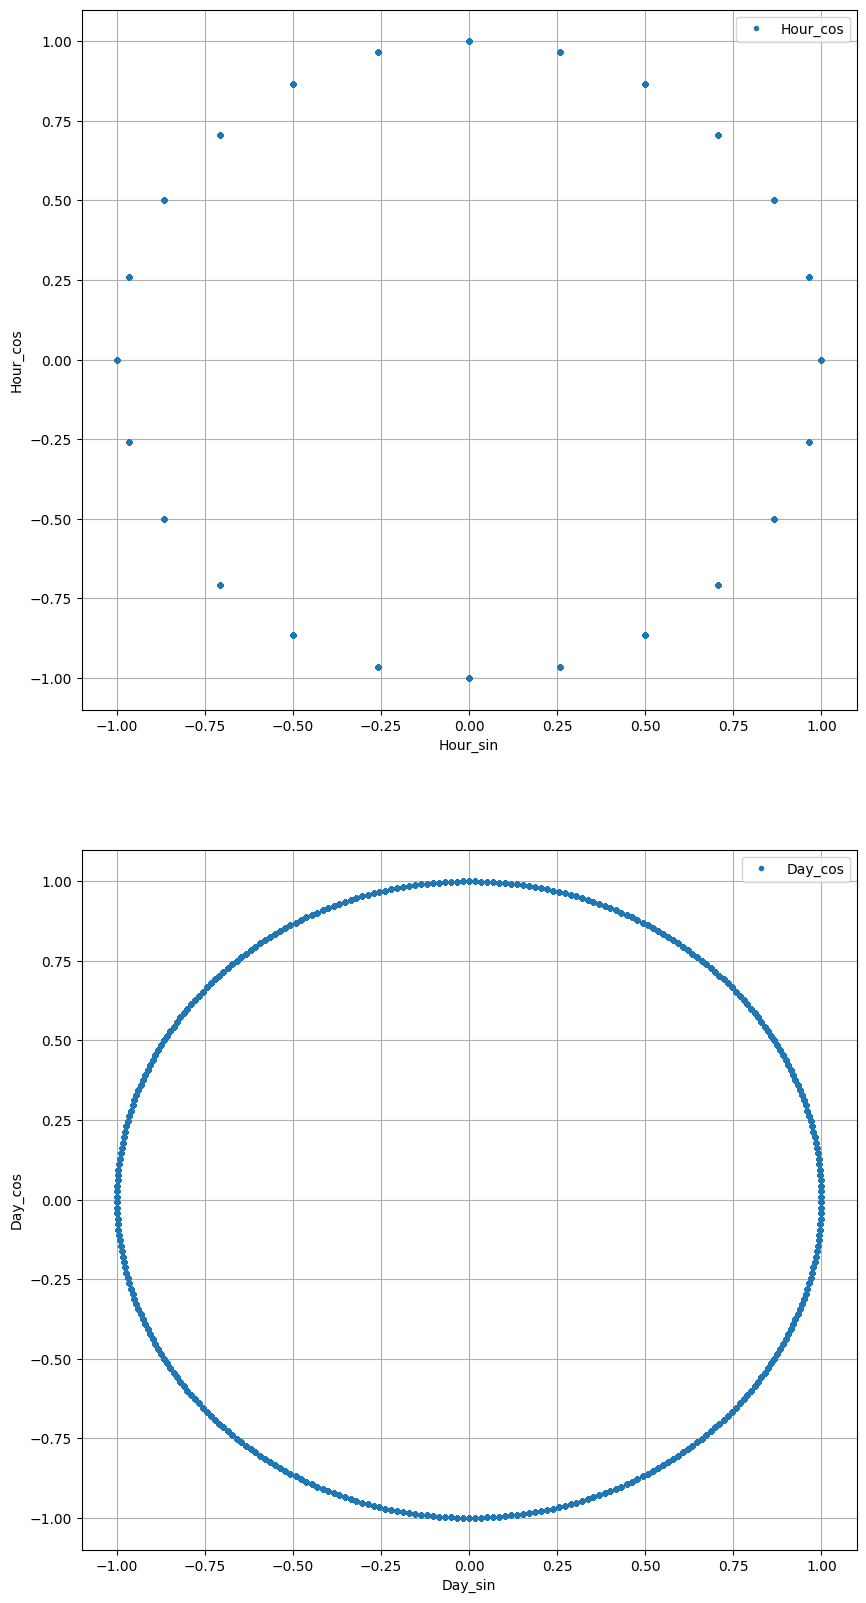

In [28]:
fig, axs = plt.subplots(2, 1,figsize=(10,20))

df.plot('Hour_sin','Hour_cos',ax=axs[0],style='.')
axs[0].set_xlabel('Hour_sin')
axs[0].set_ylabel('Hour_cos')
axs[0].grid(True)

df.plot('Day_sin','Day_cos',ax=axs[1],style='.')
axs[1].set_xlabel('Day_sin')
axs[1].set_ylabel('Day_cos')
axs[1].grid(True)

plt.show()

In [29]:
df.columns

Index(['Datetime', 'PJME_MW', 'Lag1', 'Lag2', 'Hour', 'Day', 'Month', 'Year',
       'Hour_sin', 'Hour_cos', 'Day_sin', 'Day_cos'],
      dtype='object')

In [30]:
df = df.drop(columns=['Hour','Day','Month','Year'])

In [31]:
df.head()

,Datetime,PJME_MW,Lag1,Lag2,Hour_sin,Hour_cos,Day_sin,Day_cos
0,2002-12-31 01:00:00,26498.0,NaN,NaN,0.258819,0.965926,-0.017166,0.999853
1,2002-12-31 02:00:00,25147.0,NaN,NaN,0.500000,0.866025,-0.017166,0.999853
2,2002-12-31 03:00:00,24574.0,NaN,NaN,0.707107,0.707107,-0.017166,0.999853
3,2002-12-31 04:00:00,24393.0,NaN,NaN,0.866025,0.500000,-0.017166,0.999853
4,2002-12-31 05:00:00,24860.0,NaN,NaN,0.965926,0.258819,-0.017166,0.999853


In [32]:
df = df.dropna(subset=['Lag1','Lag2'])
df = df.reset_index(drop=True)

In [37]:
df

,Datetime,PJME_MW,Lag1,Lag2,Hour_sin,Hour_cos,Day_sin,Day_cos
0,2004-12-31 01:00:00,27160.0,27077.0,25591.0,0.258819,0.965926,-2.449294e-16,1.000000
1,2004-12-31 02:00:00,25791.0,25957.0,24235.0,0.500000,0.866025,-2.449294e-16,1.000000
2,2004-12-31 03:00:00,25052.0,24930.0,23121.0,0.707107,0.707107,-2.449294e-16,1.000000
3,2004-12-31 04:00:00,24797.0,24359.0,22445.0,0.866025,0.500000,-2.449294e-16,1.000000
4,2004-12-31 05:00:00,25026.0,24400.0,22332.0,0.965926,0.258819,-2.449294e-16,1.000000
...,...,...,...,...,...,...,...,...
127745,2018-01-01 20:00:00,44284.0,31448.0,32878.0,-0.866025,0.500000,1.716633e-02,0.999853
127746,2018-01-01 21:00:00,43751.0,31246.0,32586.0,-0.707107,0.707107,1.716633e-02,0.999853
127747,2018-01-01 22:00:00,42402.0,30526.0,31877.0,-0.500000,0.866025,1.716633e-02,0.999853
127748,2018-01-01 23:00:00,40164.0,29209.0,30590.0,-0.258819,0.965926,1.716633e-02,0.999853


In [34]:
with open('dataframe.pickle', 'wb') as f:
    pickle.dump(df, f)

In [35]:
with open('dataframe.pickle', 'rb') as f:
    new_df = pickle.load(f)

new_df

,Datetime,PJME_MW,Lag1,Lag2,Hour_sin,Hour_cos,Day_sin,Day_cos
0,2004-12-31 01:00:00,27160.0,27077.0,25591.0,0.258819,0.965926,-2.449294e-16,1.000000
1,2004-12-31 02:00:00,25791.0,25957.0,24235.0,0.500000,0.866025,-2.449294e-16,1.000000
2,2004-12-31 03:00:00,25052.0,24930.0,23121.0,0.707107,0.707107,-2.449294e-16,1.000000
3,2004-12-31 04:00:00,24797.0,24359.0,22445.0,0.866025,0.500000,-2.449294e-16,1.000000
4,2004-12-31 05:00:00,25026.0,24400.0,22332.0,0.965926,0.258819,-2.449294e-16,1.000000
...,...,...,...,...,...,...,...,...
127745,2018-01-01 20:00:00,44284.0,31448.0,32878.0,-0.866025,0.500000,1.716633e-02,0.999853
127746,2018-01-01 21:00:00,43751.0,31246.0,32586.0,-0.707107,0.707107,1.716633e-02,0.999853
127747,2018-01-01 22:00:00,42402.0,30526.0,31877.0,-0.500000,0.866025,1.716633e-02,0.999853
127748,2018-01-01 23:00:00,40164.0,29209.0,30590.0,-0.258819,0.965926,1.716633e-02,0.999853


In [36]:
rows_with_nan = new_df.isna().any(axis=1)
print(new_df[rows_with_nan])

Empty DataFrame
Columns: [Datetime, PJME_MW, Lag1, Lag2, Hour_sin, Hour_cos, Day_sin, Day_cos]
Index: []
